## add_noise_filaments
load SBdata of the filaments and add noise with the ,ipynb add_noise script to compare with earlier noise adding script.

In [2]:
import numpy as np
import eagle_constants_and_units as c
import cosmo_utils as csu
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mpl_toolkits.axes_grid1 as axgrid
from astropy import constants as const
from astropy import units as u

import datetime

%matplotlib inline

%run 'add_noise.ipynb'

In [13]:
def plotdata(data,ax=None,bounds=None,colorbar=False,colmap='viridis',colorbarloc='right'):
    if ax is None:
        fig = plt.figure(figsize=(6, 3.2))
        ax = fig.add_subplot(111)
        oneplot=True
    if bounds is None:
        img = ax.imshow(data,origin='lower',cmap=cm.get_cmap(colmap),interpolation='nearest')
    else:
        img = ax.imshow(data,origin='lower',cmap=cm.get_cmap(colmap),vmin=bounds[0],vmax=bounds[1],interpolation='nearest')
    ax.set_aspect('equal')
    
    ax.patch.set_facecolor(cm.get_cmap(colmap)(0.)) # sets background color to lowest color map value
    ax.patch.set_facecolor('black')
    
    if colorbar:
        div = axgrid.make_axes_locatable(ax)
        if colorbarloc=='Top':
            cax = div.append_axes("top",size="10%",pad=0.2)
            cbar = plt.colorbar(img,cax=cax,orientation='horizontal')#,boundaries=np.linspace(0,90000))
        else:
            cax = div.append_axes("right",size="10%",pad=0.15)
            cbar = plt.colorbar(img,cax=cax,orientation='vertical')#,boundaries=np.linspace(0,90000))
        cbar.ax.tick_params()

In [15]:
SBdata = np.load('mockobservations/SBdata_full.npz')['arr_0']

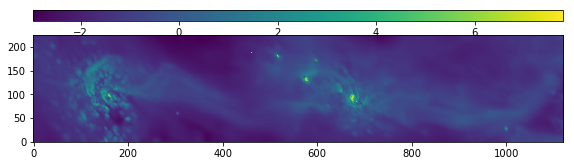

In [16]:
fig = plt.figure(figsize=(9.5,5.))
ax1 = plt.subplot(111)
plotdata(SBdata.T,ax=ax1,colorbar=True,colorbarloc='Top')

In [17]:
SBdata.shape

(1121, 225)

Resolution is None, finding minimum resolution of the similuation...
The resolution of the raw simulation at 50Mpc is 13.0357429643.
Loading data of slicewidth 5 (after rounding), number of slices is 1
./intermediatedata/data_50Mpc_13arcsec_5slwd.npz exists, loading now...
./intermediatedata/data_50Mpc_13arcsec_5slwd.npz was not saved as a tuple since too large, returning as tuple with 32000,1,13.0357429643 appended.
The type of size is <type 'float'>


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:43: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Region 1: [ 15328.  14944.  15168.  15552.] , [ 3360.  4480.  4480.  3360.]
xacross_length,yacross_length,xdown_length,ydown_length:  224, 0, -384, 1120
xacross_length > yacross_length:
iterable: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 

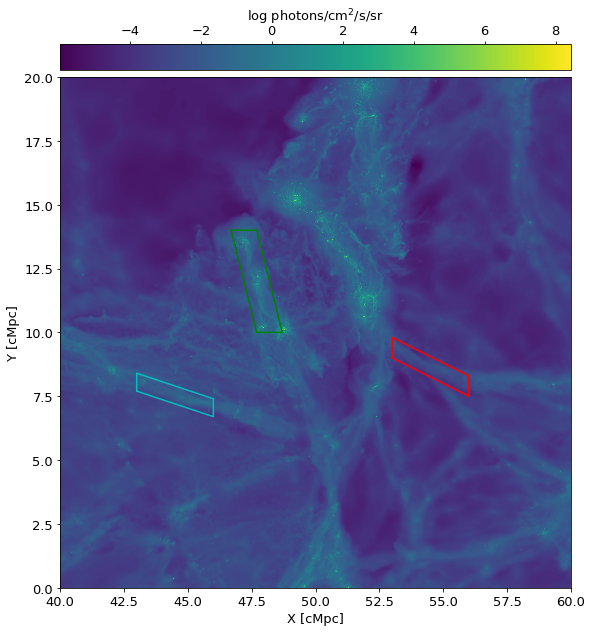

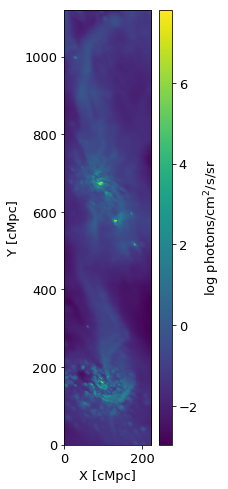

In [18]:
%run 'extract_filament.ipynb'
machine = 'chinook'
plotchecks = True

data_tuple_5 = loaddata(machine=machine,resolution=None,distance='50Mpc',slicewidth=5.)
SBdata_5 = extractfilament(data_tuple=data_tuple_5,plotchecks=True)

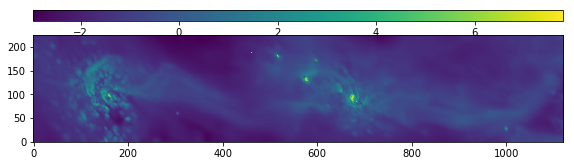

In [19]:
fig = plt.figure(figsize=(9.5,5.))
ax1 = plt.subplot(111)
plotdata(SBdata_5.T,ax=ax1,colorbar=True,colorbarloc='Top')

In [21]:
np.array_equal(SBdata, SBdata_5)

True